<a href="https://colab.research.google.com/github/GDharan10/Dataset15_CreditCardFraudDetection_Imbalance/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librarys**

In [1]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

#Machine Learning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

# **Connections**

In [2]:
#Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset**

In [3]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/creditcard.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [45]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# **DataFrame observation**


In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Dependent - Class
# Independent - Time, Amount

continuous_columns = ["Time", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                      'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', "Amount"]
category_columns = ["Class"]

#Supervised Classification

# **Data cleaning using pandas**


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df.duplicated().sum()

1081

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
#Imbalance

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [16]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [55]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


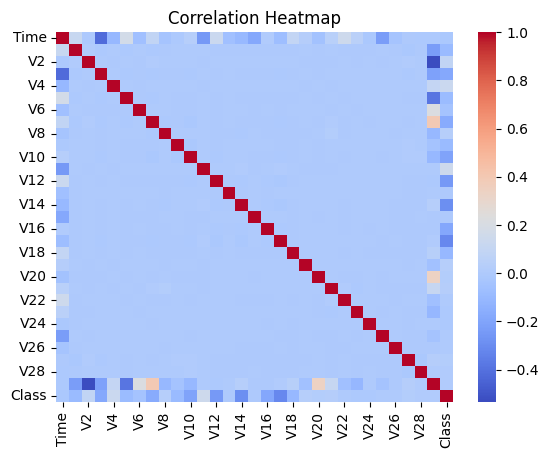

In [57]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

In [ ]:
comperativeColumn_result

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [36]:
pd.set_option('display.max_rows', None)

In [58]:
df[df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


# **Data Visualization**

<Figure size 800x600 with 0 Axes>

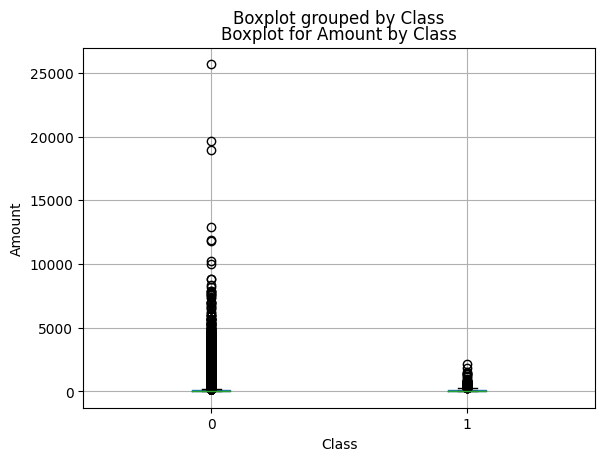

In [59]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Amount", by = "Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Boxplot for Amount by Class")
plt.show()

<Figure size 800x600 with 0 Axes>

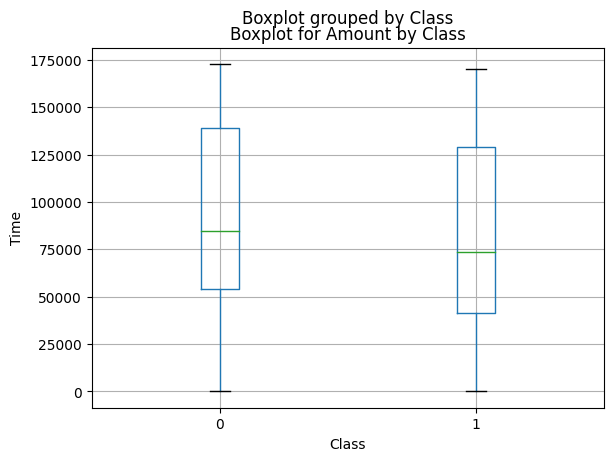

In [60]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Time", by = "Class")
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("Boxplot for Amount by Class")
plt.show()

# **Normalizing the dataset (Imbalance to balance dataset)**

In [17]:
x=df.drop(['Class'], axis=1)
y=df['Class']

In [18]:
#under sampling
from imblearn.under_sampling import NearMiss
model = NearMiss()
x_new, y_new = model.fit_resample(x,y)
x_new.shape, y_new.shape

((946, 30), (946,))

In [ ]:
#over sampling
from imblearn.combine import SMOTETomek
model = SMOTETomek()
xnew, ynew = model.fit_resample(x,y)
xnew.shape, ynew.shape

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

**2 separating independent and dependent**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**3 Identifying algorithms/Model:**

Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning

https://pypi.org/project/lazypredict/

**4 training**

https://scikit-learn.org/stable/supervised_learning.html

**5 Evaluation**

Metrics and scoring: quantifying the quality of predictions

https://scikit-learn.org/stable/modules/model_evaluation.html